![logo](../../picture/license_header_logo.png)
> **Copyright (c) 2020-2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program is part of OSRFramework. You can redistribute it and/or modify
<br>it under the terms of the GNU Affero General Public License as published by
<br>the Free Software Foundation, either version 3 of the License, or
<br>(at your option) any later version.
<br>
<br>This program is distributed in the hope that it will be useful,
<br>but WITHOUT ANY WARRANTY; without even the implied warranty of
<br>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
<br>GNU Affero General Public License for more details.
<br>
<br>You should have received a copy of the GNU Affero General Public License
<br>along with this program.  If not, see <http://www.gnu.org/licenses/>.
<br>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import random

import warnings
warnings.filterwarnings('ignore')

In [2]:
ads = pd.read_csv('../datasets/multivariate/ads.csv', index_col=['Time'], parse_dates=['Time'])

In [3]:
ads.head()

,Ads
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630


In [4]:
ads.shape

(216, 1)

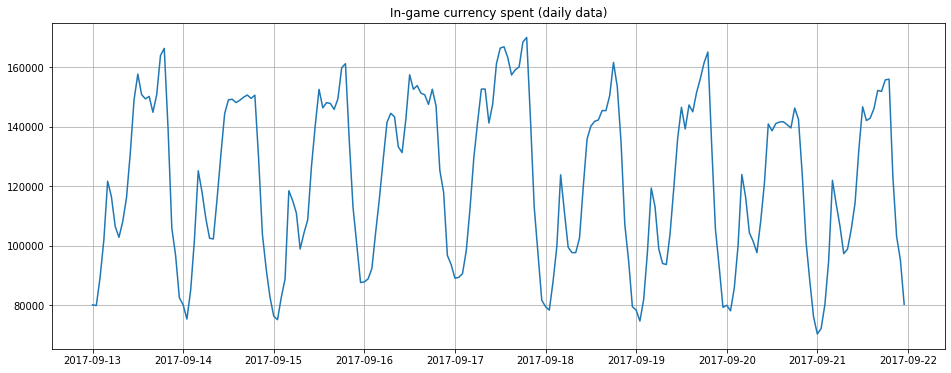

In [5]:
plt.figure(figsize=(16, 6))
plt.plot(ads)
plt.title('In-game currency spent (daily data)')
plt.grid(True)
plt.show()

# Feature Engineering


## Date Features

Extract: day, weekdays, isweekend, and lags value

In [6]:
ads_features = ads.copy()
ads_features.columns = ['y']

In [7]:
ads_features['hour'] = ads_features.index.hour
ads_features['weekday'] = ads_features.index.weekday
ads_features['is_weekend'] = 0

ads_features.loc[ads_features.weekday >= 5, 'is_weekend'] = 1

In [8]:
ads_features.head(8)

,y,hour,weekday,is_weekend
Time,,,,
2017-09-13 00:00:00,80115,0,2,0
2017-09-13 01:00:00,79885,1,2,0
2017-09-13 02:00:00,89325,2,2,0
2017-09-13 03:00:00,101930,3,2,0
2017-09-13 04:00:00,121630,4,2,0
2017-09-13 05:00:00,116475,5,2,0
2017-09-13 06:00:00,106495,6,2,0
2017-09-13 07:00:00,102795,7,2,0


## Target Encoding

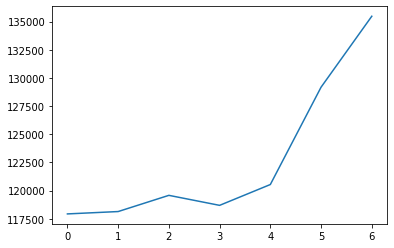

In [9]:
weekday_mean = ads_features.groupby('weekday')['y'].mean()
plt.plot(weekday_mean)

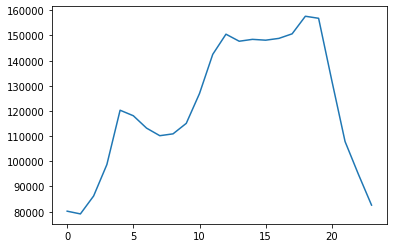

In [10]:
hour_mean = ads_features.groupby('hour')['y'].mean()
plt.plot(hour_mean)

In [11]:
ads_features['weekday_mean'] = ads_features['weekday'].map(lambda x: dict(weekday_mean)[x])
ads_features['hour_mean'] = ads_features['hour'].map(lambda x: dict(hour_mean)[x])

In [12]:
ads_features.head()

,y,hour,weekday,is_weekend,weekday_mean,hour_mean
Time,,,,,,
2017-09-13 00:00:00,80115,0,2,0,119575.416667,80178.888889
2017-09-13 01:00:00,79885,1,2,0,119575.416667,79091.111111
2017-09-13 02:00:00,89325,2,2,0,119575.416667,86223.333333
2017-09-13 03:00:00,101930,3,2,0,119575.416667,98695.000000
2017-09-13 04:00:00,121630,4,2,0,119575.416667,120291.111111


## Onehot Encoded Features

In [13]:
weekday_onehot = pd.get_dummies(ads_features['weekday'], prefix='weekday')
ads_features = pd.concat([ads_features, weekday_onehot], axis=1)

In [14]:
ads_features.head()

,y,hour,weekday,is_weekend,weekday_mean,hour_mean,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
Time,,,,,,,,,,,,,
2017-09-13 00:00:00,80115,0,2,0,119575.416667,80178.888889,0,0,1,0,0,0,0
2017-09-13 01:00:00,79885,1,2,0,119575.416667,79091.111111,0,0,1,0,0,0,0
2017-09-13 02:00:00,89325,2,2,0,119575.416667,86223.333333,0,0,1,0,0,0,0
2017-09-13 03:00:00,101930,3,2,0,119575.416667,98695.000000,0,0,1,0,0,0,0
2017-09-13 04:00:00,121630,4,2,0,119575.416667,120291.111111,0,0,1,0,0,0,0


## Lag Features

In [15]:
# Create lags features
for i in range(1, 24):
    ads_features["lag_{}".format(i)] = ads_features.y.shift(i)
ads_features.head(5)

,y,hour,weekday,is_weekend,weekday_mean,hour_mean,weekday_0,weekday_1,weekday_2,weekday_3,...,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23
Time,,,,,,,,,,,,,,,,,,,,,
2017-09-13 00:00:00,80115,0,2,0,119575.416667,80178.888889,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 01:00:00,79885,1,2,0,119575.416667,79091.111111,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 02:00:00,89325,2,2,0,119575.416667,86223.333333,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 03:00:00,101930,3,2,0,119575.416667,98695.000000,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-13 04:00:00,121630,4,2,0,119575.416667,120291.111111,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
ads_features = ads_features.dropna()
ads_features.head()

,y,hour,weekday,is_weekend,weekday_mean,hour_mean,weekday_0,weekday_1,weekday_2,weekday_3,...,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23
Time,,,,,,,,,,,,,,,,,,,,,
2017-09-13 23:00:00,82520,23,2,0,119575.416667,82589.444444,0,0,1,0,...,116125.0,108055.0,102795.0,106495.0,116475.0,121630.0,101930.0,89325.0,79885.0,80115.0
2017-09-14 00:00:00,80125,0,3,0,118687.291667,80178.888889,0,0,0,1,...,131030.0,116125.0,108055.0,102795.0,106495.0,116475.0,121630.0,101930.0,89325.0,79885.0
2017-09-14 01:00:00,75335,1,3,0,118687.291667,79091.111111,0,0,0,1,...,149020.0,131030.0,116125.0,108055.0,102795.0,106495.0,116475.0,121630.0,101930.0,89325.0
2017-09-14 02:00:00,85105,2,3,0,118687.291667,86223.333333,0,0,0,1,...,157590.0,149020.0,131030.0,116125.0,108055.0,102795.0,106495.0,116475.0,121630.0,101930.0
2017-09-14 03:00:00,102080,3,3,0,118687.291667,98695.000000,0,0,0,1,...,150715.0,157590.0,149020.0,131030.0,116125.0,108055.0,102795.0,106495.0,116475.0,121630.0


In [17]:
ads_features.tail()

,y,hour,weekday,is_weekend,weekday_mean,hour_mean,weekday_0,weekday_1,weekday_2,weekday_3,...,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23
Time,,,,,,,,,,,,,,,,,,,,,
2017-09-21 19:00:00,155890,19,3,0,118687.291667,156817.222222,0,0,0,1,...,113950.0,121910.0,94945.0,80195.0,72150.0,70335.0,76050.0,88170.0,101360.0,123945.0
2017-09-21 20:00:00,123395,20,3,0,118687.291667,132030.555556,0,0,0,1,...,106495.0,113950.0,121910.0,94945.0,80195.0,72150.0,70335.0,76050.0,88170.0,101360.0
2017-09-21 21:00:00,103080,21,3,0,118687.291667,107847.222222,0,0,0,1,...,97290.0,106495.0,113950.0,121910.0,94945.0,80195.0,72150.0,70335.0,76050.0,88170.0
2017-09-21 22:00:00,95155,22,3,0,118687.291667,94936.111111,0,0,0,1,...,98860.0,97290.0,106495.0,113950.0,121910.0,94945.0,80195.0,72150.0,70335.0,76050.0
2017-09-21 23:00:00,80285,23,3,0,118687.291667,82589.444444,0,0,0,1,...,105635.0,98860.0,97290.0,106495.0,113950.0,121910.0,94945.0,80195.0,72150.0,70335.0


In [18]:
ads_features.tail(25)

,y,hour,weekday,is_weekend,weekday_mean,hour_mean,weekday_0,weekday_1,weekday_2,weekday_3,...,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23
Time,,,,,,,,,,,,,,,,,,,,,
2017-09-20 23:00:00,76050,23,2,0,119575.416667,82589.444444,0,0,1,0,...,108265.0,97635.0,101440.0,104290.0,116335.0,123880.0,100010.0,85785.0,78110.0,79980.0
2017-09-21 00:00:00,70335,0,3,0,118687.291667,80178.888889,0,0,0,1,...,121250.0,108265.0,97635.0,101440.0,104290.0,116335.0,123880.0,100010.0,85785.0,78110.0
2017-09-21 01:00:00,72150,1,3,0,118687.291667,79091.111111,0,0,0,1,...,140850.0,121250.0,108265.0,97635.0,101440.0,104290.0,116335.0,123880.0,100010.0,85785.0
2017-09-21 02:00:00,80195,2,3,0,118687.291667,86223.333333,0,0,0,1,...,138555.0,140850.0,121250.0,108265.0,97635.0,101440.0,104290.0,116335.0,123880.0,100010.0
2017-09-21 03:00:00,94945,3,3,0,118687.291667,98695.000000,0,0,0,1,...,140990.0,138555.0,140850.0,121250.0,108265.0,97635.0,101440.0,104290.0,116335.0,123880.0
2017-09-21 04:00:00,121910,4,3,0,118687.291667,120291.111111,0,0,0,1,...,141525.0,140990.0,138555.0,140850.0,121250.0,108265.0,97635.0,101440.0,104290.0,116335.0
2017-09-21 05:00:00,113950,5,3,0,118687.291667,118093.333333,0,0,0,1,...,141590.0,141525.0,140990.0,138555.0,140850.0,121250.0,108265.0,97635.0,101440.0,104290.0
2017-09-21 06:00:00,106495,6,3,0,118687.291667,113172.777778,0,0,0,1,...,140610.0,141590.0,141525.0,140990.0,138555.0,140850.0,121250.0,108265.0,97635.0,101440.0
2017-09-21 07:00:00,97290,7,3,0,118687.291667,110168.333333,0,0,0,1,...,139515.0,140610.0,141590.0,141525.0,140990.0,138555.0,140850.0,121250.0,108265.0,97635.0


In [19]:
# create a copy
ads_features_copy = ads_features.copy()

In [20]:
# Create lags features
for i in range(1, 24):
    ads_features["y+{}".format(i)] = ads_features.y.shift(-i)
ads_features.head(10)

,y,hour,weekday,is_weekend,weekday_mean,hour_mean,weekday_0,weekday_1,weekday_2,weekday_3,...,y+14,y+15,y+16,y+17,y+18,y+19,y+20,y+21,y+22,y+23
Time,,,,,,,,,,,,,,,,,,,,,
2017-09-13 23:00:00,82520,23,2,0,119575.416667,82589.444444,0,0,1,0,...,149150.0,148040.0,148810.0,149830.0,150570.0,149440.0,150520.0,129130.0,103815.0,92175.0
2017-09-14 00:00:00,80125,0,3,0,118687.291667,80178.888889,0,0,0,1,...,148040.0,148810.0,149830.0,150570.0,149440.0,150520.0,129130.0,103815.0,92175.0,82765.0
2017-09-14 01:00:00,75335,1,3,0,118687.291667,79091.111111,0,0,0,1,...,148810.0,149830.0,150570.0,149440.0,150520.0,129130.0,103815.0,92175.0,82765.0,76315.0
2017-09-14 02:00:00,85105,2,3,0,118687.291667,86223.333333,0,0,0,1,...,149830.0,150570.0,149440.0,150520.0,129130.0,103815.0,92175.0,82765.0,76315.0,75130.0
2017-09-14 03:00:00,102080,3,3,0,118687.291667,98695.000000,0,0,0,1,...,150570.0,149440.0,150520.0,129130.0,103815.0,92175.0,82765.0,76315.0,75130.0,82640.0
2017-09-14 04:00:00,125135,4,3,0,118687.291667,120291.111111,0,0,0,1,...,149440.0,150520.0,129130.0,103815.0,92175.0,82765.0,76315.0,75130.0,82640.0,88795.0
2017-09-14 05:00:00,118030,5,3,0,118687.291667,118093.333333,0,0,0,1,...,150520.0,129130.0,103815.0,92175.0,82765.0,76315.0,75130.0,82640.0,88795.0,118430.0
2017-09-14 06:00:00,109225,6,3,0,118687.291667,113172.777778,0,0,0,1,...,129130.0,103815.0,92175.0,82765.0,76315.0,75130.0,82640.0,88795.0,118430.0,115190.0
2017-09-14 07:00:00,102475,7,3,0,118687.291667,110168.333333,0,0,0,1,...,103815.0,92175.0,82765.0,76315.0,75130.0,82640.0,88795.0,118430.0,115190.0,110940.0


In [21]:
def timeseries_train_test_split(X, y, test_size):
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [22]:
targets = ['y']
targets = targets + ["y+{}".format(i) for i in range(1, 24)]
targets

['y',
 'y+1',
 'y+2',
 'y+3',
 'y+4',
 'y+5',
 'y+6',
 'y+7',
 'y+8',
 'y+9',
 'y+10',
 'y+11',
 'y+12',
 'y+13',
 'y+14',
 'y+15',
 'y+16',
 'y+17',
 'y+18',
 'y+19',
 'y+20',
 'y+21',
 'y+22',
 'y+23']

In [23]:
y = ads_features.dropna()[targets]
X = ads_features.dropna().drop(targets, axis=1)

# reserve 10% of data for testing
train_X, test_X, train_y, test_y = timeseries_train_test_split(X, y, test_size=0.1)


In [24]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((153, 35), (153, 24), (17, 35), (17, 24))

In [25]:
# Data Normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(train_X)
train_X_scaled = scaler.transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [26]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(hidden_layer_sizes=(50, 50, 10), verbose=True, max_iter=25000)
nn.fit(train_X_scaled,train_y)

Iteration 1, loss = 7924062680.67536831
Iteration 2, loss = 7924059507.31849957
Iteration 3, loss = 7924056336.61496449
Iteration 4, loss = 7924053162.32927990
Iteration 5, loss = 7924049958.87136650
Iteration 6, loss = 7924046708.79862881
Iteration 7, loss = 7924043473.46327877
Iteration 8, loss = 7924040245.99702740
Iteration 9, loss = 7924036963.05769730
Iteration 10, loss = 7924033570.22877216
Iteration 11, loss = 7924030030.73102760
Iteration 12, loss = 7924026289.85683823
Iteration 13, loss = 7924022338.84230137
Iteration 14, loss = 7924018140.99897385
Iteration 15, loss = 7924013692.04257488
Iteration 16, loss = 7924008963.63067245
Iteration 17, loss = 7924003945.86049080
Iteration 18, loss = 7923998625.23748779
Iteration 19, loss = 7923992987.49587059
Iteration 20, loss = 7923987016.83675480
Iteration 21, loss = 7923980708.21604347
Iteration 22, loss = 7923974037.01024628
Iteration 23, loss = 7923966985.74018478
Iteration 24, loss = 7923959527.11522007
Iteration 25, loss = 7923

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=25000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=True,
             warm_start=False)

In [27]:
nn.score(test_X_scaled, test_y)

0.686876069685112

In [28]:
test_sample = ads_features_copy.loc['2017-09-21 00:00:00'] # predict 2017-09-21
test_sample = test_sample.drop('y')

scaled_test_sample = scaler.transform(test_sample.values.reshape(1, -1))

scaled_test_sample

array([[-1.58631888, -0.04736412, -0.6761234 , -0.67577412, -1.57140052,
        -0.43133109, -0.43133109, -0.25      ,  2.31840462, -0.43133109,
        -0.43133109, -0.43133109, -1.66210861, -1.22468685, -0.7524284 ,
         0.05274537,  0.69631621,  0.81843454,  0.56724736,  0.59331124,
         0.61596228,  0.60075761,  0.56723604,  0.47420078,  0.56927891,
        -0.1363244 , -0.60336013, -0.9842185 , -0.83511032, -0.72413401,
        -0.27493851,  0.01502109, -0.85336053, -1.35681679, -1.62115904]])

In [29]:
test_prediction = nn.predict(scaled_test_sample)
test_prediction

array([[ 77646.79153553,  84549.11347569,  97587.07312975,
        111233.70190207, 119561.84085558, 119195.18551731,
        112057.91791534, 105375.07017828, 106304.63919429,
        117497.58931941, 134612.5076355 , 149114.15286064,
        154415.10945543, 150178.14074304, 141862.68095088,
        136834.79449938, 138774.88861434, 145018.60679837,
        148631.01133149, 143751.13638694, 128567.23828218,
        107628.39624281,  88566.27812431,  77264.03942589]])

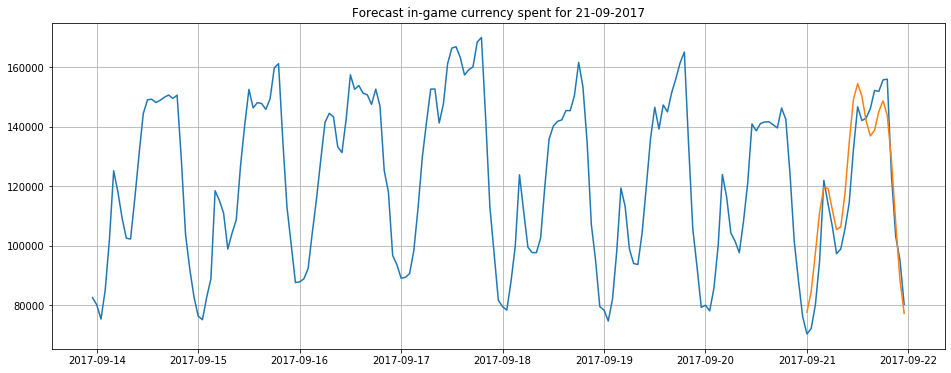

In [30]:
plt.figure(figsize=(16, 6))
plt.plot(ads_features_copy['y'])
plt.plot(pd.Series(test_prediction.flatten(), index=ads_features_copy.loc['2017-09-21 00:00:00':].index))
plt.title('Forecast in-game currency spent for 21-09-2017')
plt.grid(True)
plt.show()